In [ ]:
# conda install -c conda-forge fbprophet

In [81]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

df = pd.read_csv('EtsySoldOrdersLatLong.csv', infer_datetime_format = True)
pop = pd.read_csv('2016popvote.csv')#Bring in 2016 popular votes by state
df = pd.merge(df, pop, on='Ship State')#merge by key of "Ship State"
df.head(2)

,Sale Date,Order ID,Buyer User ID,Full Name,First Name,Last Name,Number of Items,Payment Method,Date Shipped,Street 1,Street 2,Ship City,Ship State,Ship Zipcode,Ship Country,Currency,Order Value,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Shipping,Sales Tax,Order Total,Status,Card Processing Fees,Order Net,Adjusted Order Total,Adjusted Card Processing Fees,Adjusted Net Order Amount,Buyer,Order Type,Payment Type,InPerson Discount,InPerson Location,FullAddress,LatLong,Lat,latitude,longitude,countryandshipping,Month Sale,latitude_bin,longitude_bin,Trump,Clinton
0,2012-12-31,75244054,coolJeans,Jamie Favela Le,Jamie Favela Le,0,1,Credit Card,2013-01-01,13608 chestnut street,0,Whittier,CA,90605,United States,USD,5.0,0.0,0.0,0.0,0.0,1.99,0.0,6.99,0.0,0.46,6.53,0.0,0.0,0.0,Jamie Favela Le,online,online_cc,0.0,0.0,"13608 chestnut street ,Whittier,CA,90605","13608, Chestnut Street, South Whittier, East W...","(33.9588002499197, -118.031060013306, 0.0)",33.958800,-118.031060,"United States, $1.99",12,"(29.899, 40.379]","(-150.197, -117.624]","4,483,814","8,753,792"
1,2012-12-27,74853053,benkluver,Ben Kluver,Ben,Kluver,1,PayPal,2012-12-27,6258 Muirfield Dr,0,Goleta,CA,93117,United States,USD,15.0,0.0,0.0,0.0,0.0,5.00,0.0,20.00,0.0,0.00,20.00,0.0,0.0,0.0,Ben Kluver,online,online_pp,0.0,0.0,"6258 Muirfield Dr,Goleta,CA,93117","6258, Muirfield Drive, Goleta, Santa Barbara C...","(34.447794, -119.8432085, 0.0)",34.447794,-119.843209,"United States, $5.0",12,"(29.899, 40.379]","(-150.197, -117.624]","4,483,814","8,753,792"


In [82]:
df.index = pd.DatetimeIndex(df['Sale Date']).floor('D')
all_days = pd.date_range(df.index.min(), df.index.max(), freq='D')
df = df.loc[all_days]

# df = df.reindex(pd.date_range(start='2015-07-01', end='2020-05-23'))
# df.head(2)

C:\Users\lilyx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [83]:
df = df.fillna(0)
df.head(5)

,Sale Date,Order ID,Buyer User ID,Full Name,First Name,Last Name,Number of Items,Payment Method,Date Shipped,Street 1,Street 2,Ship City,Ship State,Ship Zipcode,Ship Country,Currency,Order Value,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Shipping,Sales Tax,Order Total,Status,Card Processing Fees,Order Net,Adjusted Order Total,Adjusted Card Processing Fees,Adjusted Net Order Amount,Buyer,Order Type,Payment Type,InPerson Discount,InPerson Location,FullAddress,LatLong,Lat,latitude,longitude,countryandshipping,Month Sale,latitude_bin,longitude_bin,Trump,Clinton
Sale Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-10,2012-01-10,45990239.0,APreciousPresence,Janis Flynn,Janis,Flynn,1.0,PayPal,2012-03-16,85 Lafayette Street Apt. 1-4,0,Lewiston,ME,04240,United States,USD,15.0,0.0,0.0,0.0,0.0,5.3,0.0,20.3,0.0,0.0,20.3,0.0,0.0,0.0,Janis Flynn,online,online_pp,0.0,0.0,"85 Lafayette Street Apt. 1-4,Lewiston,ME,04240",0,0,0.0,0.0,"United States, $5.3",1.0,"(-1.541, 8.939]","(-20.874, 11.376]","335,593","357,735"
2012-01-11,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0,0,0,0
2012-01-12,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0,0,0,0
2012-01-13,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0,0,0,0
2012-01-14,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0,0,0,0


In [84]:
df['SaleDateExcludeYear'] = pd.to_datetime(df['Sale Date']).map(lambda x: 100*x.month + x.day)
df['ProximityChristmas'] = 1225 - df['SaleDateExcludeYear']
df['ProximityThanksgiving'] = 1125 - df['SaleDateExcludeYear']
df.head(2)

,Sale Date,Order ID,Buyer User ID,Full Name,First Name,Last Name,Number of Items,Payment Method,Date Shipped,Street 1,Street 2,Ship City,Ship State,Ship Zipcode,Ship Country,Currency,Order Value,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Shipping,Sales Tax,Order Total,Status,Card Processing Fees,Order Net,Adjusted Order Total,Adjusted Card Processing Fees,Adjusted Net Order Amount,Buyer,Order Type,Payment Type,InPerson Discount,InPerson Location,FullAddress,LatLong,Lat,latitude,longitude,countryandshipping,Month Sale,latitude_bin,longitude_bin,Trump,Clinton,SaleDateExcludeYear,ProximityChristmas,ProximityThanksgiving
Sale Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-10,2012-01-10,45990239.0,APreciousPresence,Janis Flynn,Janis,Flynn,1.0,PayPal,2012-03-16,85 Lafayette Street Apt. 1-4,0,Lewiston,ME,04240,United States,USD,15.0,0.0,0.0,0.0,0.0,5.3,0.0,20.3,0.0,0.0,20.3,0.0,0.0,0.0,Janis Flynn,online,online_pp,0.0,0.0,"85 Lafayette Street Apt. 1-4,Lewiston,ME,04240",0,0,0.0,0.0,"United States, $5.3",1.0,"(-1.541, 8.939]","(-20.874, 11.376]","335,593","357,735",110,1115,1015
2012-01-11,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,101,1124,1024


In [94]:
df['y'] = df['Number of Items']
df['ds'] = df['Sale Date']
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail(2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\lilyx\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds
3574,2020-06-10
3575,2020-06-11


In [96]:
import plotly.graph_objs as go
import plotly.plotly as py

import pandas as pd
from datetime import datetime

data = [go.Scatter(x=df['Sale Date'], y=df['Number of Items'])]

py.iplot(data, filename = 'time-series-simple')

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [97]:
data = [go.Scatter(x=future['Sale Date'], y=future['Number of Items'])]

py.iplot(data, filename = 'time-series-simple')

KeyError: 'Sale Date'

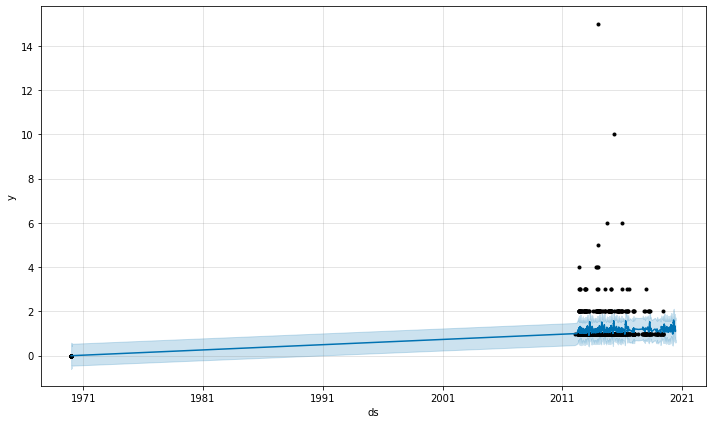

In [99]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [89]:
# from sklearn.model_selection import train_test_split

# train = df[(df['Sale Date'] > '2012-5-1') & (df['Sale Date'] < '2015-5-1')]
# test = df[(df['Sale Date'] > '2015-5-1')]

# target = 'Number of Items'
# features = df.columns.drop([target, 'Card Processing Fees', 'Order Net', 'Adjusted Order Total', 'Adjusted Card Processing Fees', 'Adjusted Net Order Amount', 'Shipping'])

# X_train = train[features]
# y_train = train[target]
# X_test = test[features]
# y_test = test[target]

# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size = 0.2, random_state=42)

In [90]:
# df['Month2'] = pd.to_datetime(df['Sale Date']).dt.month
# df['Date Shipped'] = pd.to_datetime(df['Date Shipped'])
# pd.to_datetime(df['birth_date']).dt.to_period('M')
# df['Sale Date'].month
# df.head(2)

In [91]:
# def wrangle(X):
#     """Wrangles train, validate, and test sets in the same way"""
#     X = X.copy()
# #peak shopping season
# #     X['HolidayShopping'] = [X[(pd.to_datetime(X['Sale Date']).dt.month >= 11) & (pd.to_datetime(X['Sale Date']).dt.day >= 22)]] & [X[(pd.to_datetime(X['Sale Date']).dt.month <= 12) & (pd.to_datetime(X['Sale Date']).dt.day <= 31)]]
#     X['SaleDateExcludeYear'] = pd.to_datetime(X['Sale Date']).map(lambda x: 100*x.year + x.month)
# #     X['ProximityToChristmas'] = X['Sale Date'].map(lambda x: 100*x.year + x.month)
    
# train = wrangle(train)
# # val = wrangle(val)
# test = wrangle(test)